In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,label
0,71,71,64,98,150,86,68,209,left
1,72,72,63,98,149,84,69,205,left
2,72,75,66,98,152,82,73,202,left
3,75,72,66,98,154,84,75,199,left
4,74,75,65,98,159,85,79,195,left


In [4]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1) , df['label'], test_size=0.25)
print('Splitted Successfully')

Splitted Successfully


In [23]:
X_test

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
7283,146,89,76,54,79,78,116,211
15291,110,90,126,64,50,84,110,64
1601,101,151,89,63,156,53,48,94
3785,142,74,124,89,56,97,86,68
1445,204,76,76,85,220,84,154,71
...,...,...,...,...,...,...,...,...
1762,58,159,47,160,45,117,98,79
10089,61,144,71,133,155,84,88,239
4035,79,111,86,109,60,112,72,170
11132,56,58,81,64,59,62,89,62


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

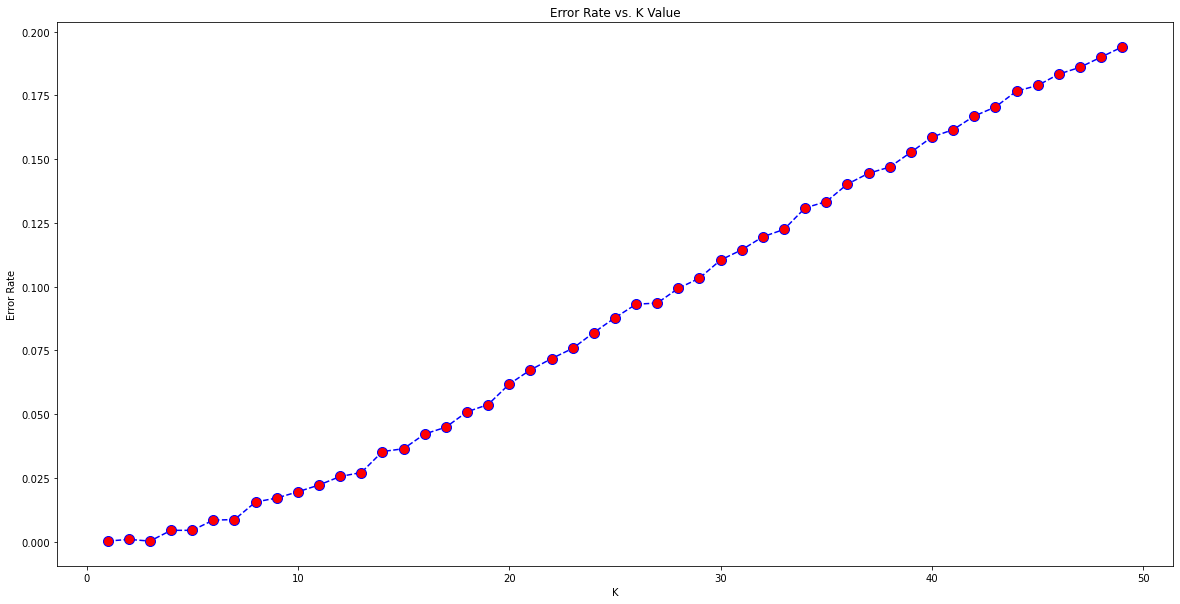

In [26]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))


[[775   0   0   0   0   0]
 [  0 745   0   0   0   0]
 [  0   0 761   0   1   0]
 [  0   0   0 746   0   0]
 [  0   0   0   0 745   0]
 [  0   0   0   0   0 727]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        back       1.00      1.00      1.00       775
       front       1.00      1.00      1.00       745
        left       1.00      1.00      1.00       762
       right       1.00      1.00      1.00       746
       start       1.00      1.00      1.00       745
        stop       1.00      1.00      1.00       727

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

